# CNNの1層目を可視化する（学習前、学習後）

## 参考URL
https://qiita.com/fukuit/items/b3fa460577a0ea139c88

https://qiita.com/shyne/items/31721724820dcfae4baf

In [172]:
def divide_train_and_validation_data(x_train,y_train):
    '''
    学習データからバリデーションデータを抽出する
    '''
    from sklearn.model_selection import train_test_split
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.175)
    return x_train,y_train,x_valid,y_valid

In [176]:
def normalize_data(x_train,x_valid,x_test):
    '''
    データを０〜１に正規化
    '''
    x_train = x_train.astype('float32')
    x_valid = x_valid.astype('float32')
    x_test = x_test.astype('float32')
    x_train = x_train / 255
    x_valid = x_valid / 255
    x_test = x_test / 255
    return x_train,x_valid,x_test

In [177]:
def convert_to_one_hot_vector(y_train,y_valid,y_test):
    # one-hot vector形式に変換する
    y_train = keras.utils.to_categorical(y_train)
    y_valid = keras.utils.to_categorical(y_valid)
    y_test = keras.utils.to_categorical(y_test)
    return y_train,y_valid,y_test

In [5]:
# ライブラリのインポート
%matplotlib inline
import keras
from keras import datasets
import matplotlib.pyplot as plt

In [164]:
# MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train,y_train,x_valid,y_valid = divide_train_and_validation_data(x_train,y_train)

UnboundLocalError: local variable 'x_train' referenced before assignment

## データの確認

In [59]:
# 学習データ
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [60]:
# テストデータ
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


5


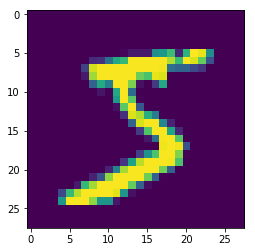

In [61]:
plt.imshow(x_train[0])
print(y_train[0])

## CNN構築

```python:Conv2D
keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

```python:MaxPooling2D
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
```

In [154]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

num_classes = 10

model = Sequential()
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
model.summary()
initial_weights = model.get_weights()[0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [85]:
# チャンネル情報を付加
x_train = x_train.reshape(len(x_train),28,28,1)
x_valid = x_valid.reshape(len(x_valid),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
x_train,x_valid,x_test = normalize_data(x_train,x_valid,x_test)
y_train,y_valid,y_test = convert_to_one_hot_vector(y_train,y_valid,y_test)

In [155]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Train on 49500 samples, validate on 10500 samples
Epoch 1/20
49500/49500 [==============================] - 31s 616us/step - loss: 0.2271 - acc: 0.9298 - val_loss: 0.0733 - val_acc: 0.9791
Epoch 2/20
49500/49500 [==============================] - 30s 614us/step - loss: 0.0609 - acc: 0.9813 - val_loss: 0.0803 - val_acc: 0.9750
Epoch 3/20
49500/49500 [==============================] - 35s 699us/step - loss: 0.0393 - acc: 0.9879 - val_loss: 0.0556 - val_acc: 0.9831
Epoch 4/20
49500/49500 [==============================] - 33s 658us/step - loss: 0.0281 - acc: 0.9912 - val_loss: 0.0762 - val_acc: 0.9792
Epoch 5/20
49500/49500 [==============================] - 33s 661us/step - loss: 0.0199 - acc: 0.9935 - val_loss: 0.0496 - val_acc: 0.9863
Epoch 6/20
49500/49500 [==============================] - 33s 667us/step - loss: 0.0148 - acc: 0.9952 - val_loss: 0.0579 - val_acc: 0.9859
Epoch 7/20
49500/49500 [==============================] - 33s 671us/step - loss: 0.0108 - acc: 0.9966 - val_loss: 0.

In [156]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06836892346030618
Test accuracy: 0.9887


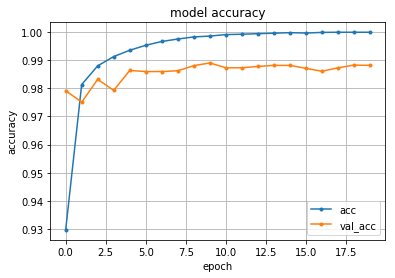

In [157]:
plt.plot(history.history['acc'], marker='.', label='acc')
plt.plot(history.history['val_acc'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

In [122]:
model.get_weights()[0].shape

(5, 5, 1, 32)

In [121]:
for weight in model.get_weights():
    print(weight.shape)

(5, 5, 1, 32)
(32,)
(4608, 128)
(128,)
(128, 10)
(10,)


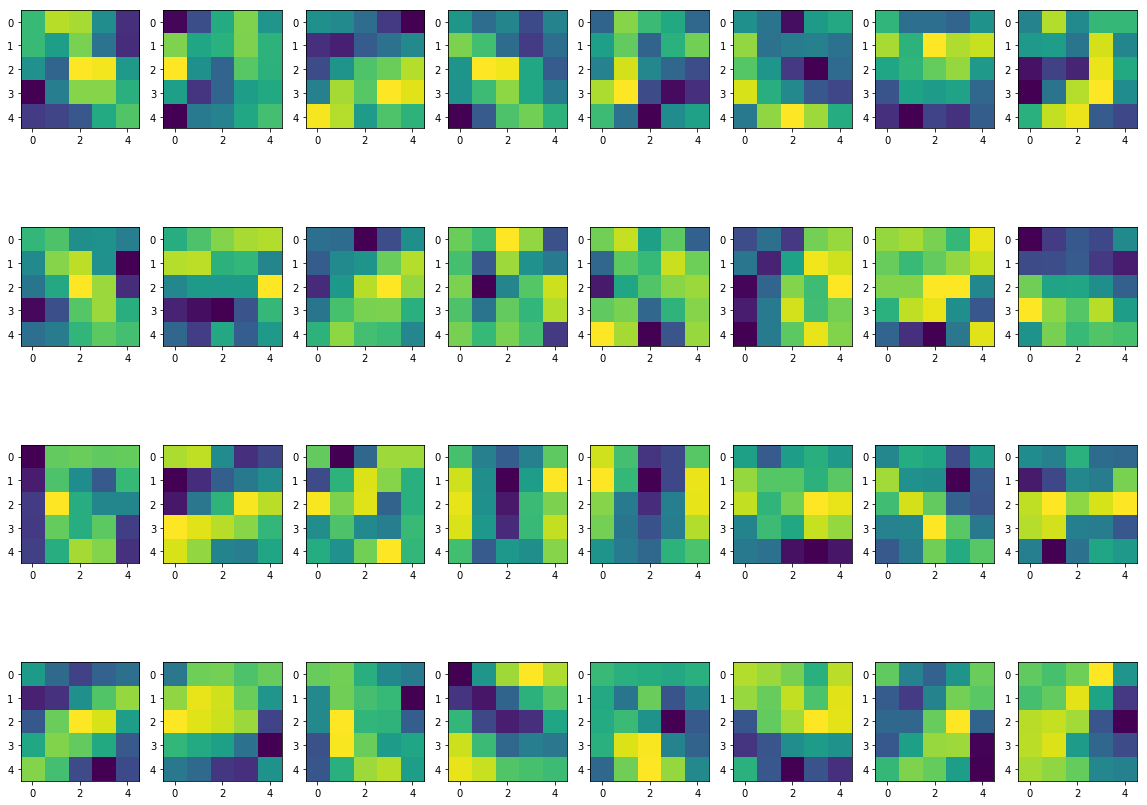

In [158]:
conv2d_weights = model.get_weights()[0]
weight_array = []
col = 8
row = 4
plt.figure(figsize=(20, 16)) # figureの縦横の大きさ
plt.subplots_adjust(hspace=0,wspace=0.2)
for index in range(conv2d_weights.shape[3]):
    weight = conv2d_weights[:,:,0,index]
    weight_array.append(weight)
    x = index % col + 1
    y = int(index / col) + 1
    plt.subplot(row,col,index+1)
    plt.imshow(weight)

# Cifar10でやってみる
0 - airplane
1 - automobile
2 - bird
3 - cat
4 - deer
5 - dog
6 - frog
7 - horse
8 - ship
9 - truck

In [178]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,y_train,x_valid,y_valid = divide_train_and_validation_data(x_train,y_train)
x_train,x_valid,x_test = normalize_data(x_train,x_valid,x_test)
y_train,y_valid,y_test = convert_to_one_hot_vector(y_train,y_valid,y_test)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


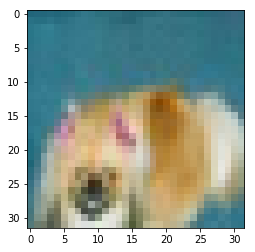

In [179]:
plt.imshow(x_train[0])
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


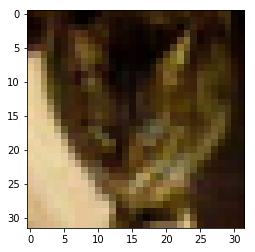

In [180]:
plt.imshow(x_train[1])
print(y_train[1])

In [181]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(41250, 32, 32, 3)
(41250, 10)
(8750, 32, 32, 3)
(8750, 10)
(10000, 32, 32, 3)
(10000, 10)


In [184]:
num_classes = 10

cifar10_model = Sequential()
cifar10_model.add(Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(32,32,3)))
cifar10_model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
cifar10_model.add(MaxPooling2D()) # 16,16,3
cifar10_model.add(Conv2D(64,(5,5),activation='relu',padding='same'))
cifar10_model.add(Conv2D(64,(5,5),activation='relu',padding='same'))
cifar10_model.add(MaxPooling2D()) # 8,8,3
cifar10_model.add(Flatten())
cifar10_model.add(Dense(128,activation='relu'))
cifar10_model.add(Dense(num_classes,activation='softmax'))
cifar10_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
cifar10_model.summary()
cifar10_initial_weights = cifar10_model.get_weights()[0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 4096)              0         
__________

In [186]:
# train
batch_size = 128
epochs = 20

history = cifar10_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Train on 41250 samples, validate on 8750 samples
Epoch 1/20
14336/41250 [=========>....................] - ETA: 8:04 - loss: 2.3399 - acc: 0.1692

KeyboardInterrupt: 

In [192]:
a = set('1','2','3')
b = set('2','3','4')
len(a&b)

TypeError: set expected at most 1 arguments, got 3